# Import

In [1]:
# Warning control
import warnings
import os
from dotenv import load_dotenv
from crewai import Agent, Task, Crew
from crewai_tools import SerperDevTool, ScrapeWebsiteTool, WebsiteSearchTool
from IPython.display import Markdown

load_dotenv()  # take environment variables from .env.
warnings.filterwarnings("ignore")


os.environ["OPENAI_MODEL_NAME"] = "gpt-4o"  # "gpt-4o", "gpt-4o-mini"
openai_api_key = os.getenv("OPENAI_API_KEY")

# L3: Multi-agent Customer Support Automation


In this lesson, you will learn about the six key elements which help make Agents perform even better:
- Role Playing
- Focus
- Tools
- Cooperation
- Guardrails
- Memory

In [2]:
support_agent = Agent(
    role="Senior Support Representative",
    goal="Be the most friendly and helpful " "support representative in your team",
    backstory=(
        "You work at crewAI (https://crewai.com) and "
        " are now working on providing "
        "support to {customer}, a super important customer "
        " for your company."
        "You need to make sure that you provide the best support!"
        "Make sure to provide full complete answers, "
        " and make no assumptions."
    ),
    allow_delegation=False,
    verbose=True,
)

In [3]:
support_quality_assurance_agent = Agent(
    role="Support Quality Assurance Specialist",
    goal="Get recognition for providing the "
    "best support quality assurance in your team",
    backstory=(
        "You work at crewAI (https://crewai.com) and "
        "are now working with your team "
        "on a request from {customer} ensuring that "
        "the support representative is "
        "providing the best support possible.\n"
        "You need to make sure that the support representative "
        "is providing full"
        "complete answers, and make no assumptions."
    ),
    allow_delegation=True,
    verbose=True,
)

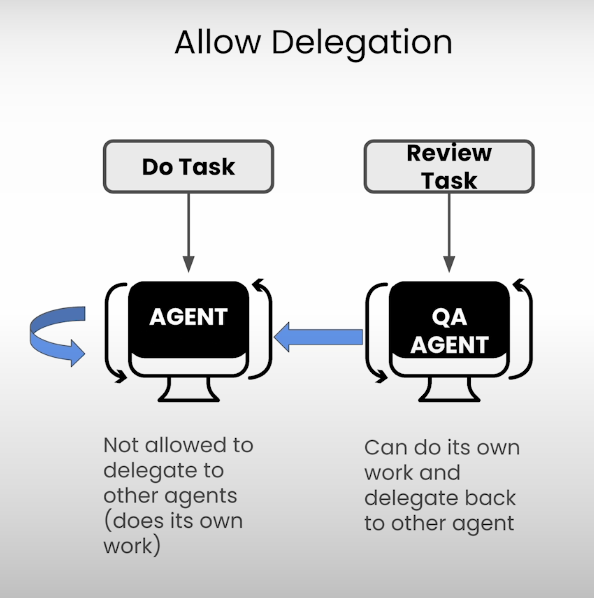

* Role Playing: Both agents have been given a role, goal and backstory.
* Focus: Both agents have been prompted to get into the character of the roles they are playing.
* Cooperation: Support Quality Assurance Agent can delegate work back to the Support Agent, allowing for these agents to work together.

# Tools, Guardrails and Memory

## Tools

Instantiate a document scraper tool that scrapes a page (only 1 URL) of the CrewAI documentation.

In [4]:
docs_scrape_tool = ScrapeWebsiteTool(
    website_url="https://docs.crewai.com/concepts/memory"
)

Different Ways to Give Agents Tools

- Agent Level: The Agent can use the Tool(s) on any Task it performs.
- Task Level: The Agent will only use the Tool(s) when performing that specific Task.

**Note**: Task Tools override the Agent Tools.

## Tasks

The tool `docs_scrape_tool` is assigned to the task `inquiry_resolution`.

In [5]:
inquiry_resolution = Task(
    description=(
        "{customer} just reached out with a super important ask:\n"
        "{inquiry}\n\n"
        "{person} from {customer} is the one that reached out. "
        "Make sure to use everything you know "
        "to provide the best support possible."
        "You must strive to provide a complete "
        "and accurate response to the customer's inquiry."
    ),
    expected_output=(
        "A detailed, informative response to the "
        "customer's inquiry that addresses "
        "all aspects of their question.\n"
        "The response should include references "
        "to everything you used to find the answer, "
        "including external data or solutions. "
        "Ensure the answer is complete, "
        "leaving no questions unanswered, and maintain a helpful and friendly "
        "tone throughout."
    ),
    tools=[docs_scrape_tool],
    agent=support_agent,
)

The task `quality_assurance_review` has no Tool(s) assigned to it.  
Here the QA Agent will only review the work of the Support Agent

In [6]:
quality_assurance_review = Task(
    description=(
        "Review the response drafted by the Senior Support Representative for {customer}'s inquiry. "
        "Ensure that the answer is comprehensive, accurate, and adheres to the "
        "high-quality standards expected for customer support.\n"
        "Verify that all parts of the customer's inquiry "
        "have been addressed "
        "thoroughly, with a helpful and friendly tone.\n"
        "Check for references and sources used to "
        " find the information, "
        "ensuring the response is well-supported and "
        "leaves no questions unanswered."
    ),
    expected_output=(
        "A final, detailed, and informative response "
        "ready to be sent to the customer.\n"
        "This response should fully address the "
        "customer's inquiry, incorporating all "
        "relevant feedback and improvements.\n"
        "Don't be too formal, we are a chill and cool company "
        "but maintain a professional and friendly tone throughout."
    ),
    agent=support_quality_assurance_agent,
)


## Creating the Crew

In [7]:
crew = Crew(
    agents=[support_agent, support_quality_assurance_agent],
    tasks=[inquiry_resolution, quality_assurance_review],
    verbose=2,
    memory=True,
)

## Guardrails

In [8]:
inputs = {
    "customer": "DeepLearningAI",
    "person": "Andrew Ng",
    "inquiry": "I need help with setting up a Crew "
    "and kicking it off, specifically "
    "how can I add memory to my crew? "
    "Can you provide guidance?",
}
result = crew.kickoff(inputs=inputs)

 [DEBUG]: == Working Agent: Senior Support Representative
 [INFO]: == Starting Task: DeepLearningAI just reached out with a super important ask:
I need help with setting up a Crew and kicking it off, specifically how can I add memory to my crew? Can you provide guidance?

Andrew Ng from DeepLearningAI is the one that reached out. Make sure to use everything you know to provide the best support possible.You must strive to provide a complete and accurate response to the customer's inquiry.


> Entering new CrewAgentExecutor chain...
Thought: I need to find specific information on how to add memory to a Crew within the crewAI platform. The best way to do this is to consult the official documentation on the CrewAI website.

Action: Read website content
Action Input: {"url": "https://docs.crewai.com/concepts/memory"}
 

Memory - CrewAICrewAI home pageSearch CrewAI docscrewAIInc/crewAIcrewAIInc/crewAISearchNavigationCore ConceptsMemoryGet StartedExamplesCrewAI home pageCommunityChangelogGet 

In [9]:
Markdown(result)

Hello Andrew,

Thank you so much for reaching out, and it's truly a pleasure to assist you! We're thrilled to be working with DeepLearningAI, and I'm here to ensure you have all the support you need to successfully set up your crew with memory capabilities.

### Summary
In crewAI, the memory system is a powerful feature designed to enhance the capabilities of AI agents by enabling them to remember, reason, and learn from past interactions. This response will guide you through adding and configuring memory in your crew to ensure optimal performance.

### Memory System Components

1. **Short-Term Memory**: Temporarily stores recent interactions and outcomes, allowing agents to recall information relevant to their current context during executions.

2. **Long-Term Memory**: Preserves valuable insights and learnings from past tasks, enabling agents to build and refine their knowledge over time.

3. **Entity Memory**: Captures and organizes information about entities (people, places, concepts) encountered during tasks, enhancing understanding and relationship mapping.

4. **Contextual Memory**: Combines the above types to maintain interaction context, leading to more coherent and relevant responses.

### Implementing Memory in Your Crew

To add memory to a crew, you'll need to enable and customize each memory component based on your crew’s objectives and tasks. By default, the memory system is disabled. You can activate it by setting `memory=True` in the crew configuration. Here's a basic example of how to configure a crew with memory:

```python
from crewai import Crew, Agent, Task, Process

# Assemble your crew with memory capabilities
my_crew = Crew(
    agents=[...],
    tasks=[...],
    process=Process.sequential,
    memory=True,
    verbose=True
)
```

### Customizing Memory Instances

If you need more advanced configurations, such as using custom memory storage or embedding models, here's an example:

```python
from crewai import Crew, Agent, Task, Process
from crewai.memory import EnhanceLongTermMemory, EnhanceShortTermMemory, EnhanceEntityMemory
from crewai.storage import LTMSQLiteStorage, CustomRAGStorage

# Assemble your crew with custom memory capabilities
my_crew = Crew(
    agents=[...],
    tasks=[...],
    process=Process.sequential,
    memory=True,
    long_term_memory=EnhanceLongTermMemory(
        storage=LTMSQLiteStorage(
            db_path="/my_data_dir/my_crew1/long_term_memory_storage.db"
        )
    ),
    short_term_memory=EnhanceShortTermMemory(
        storage=CustomRAGStorage(
            crew_name="my_crew",
            storage_type="short_term",
            data_dir="//my_data_dir",
            model=embedder["model"],
            dimension=embedder["dimension"],
        ),
    ),
    entity_memory=EnhanceEntityMemory(
        storage=CustomRAGStorage(
            crew_name="my_crew",
            storage_type="entities",
            data_dir="//my_data_dir",
            model=embedder["model"],
            dimension=embedder["dimension"],
        ),
    ),
    verbose=True,
)
```

### Using Different Embedding Providers

By default, crewAI uses OpenAI embeddings, but you can customize this. Here are a few options:

- **OpenAI**: Use the default setting or specify your API key and model.
- **Google AI**, **Azure OpenAI**, **Vertex AI**, **Cohere**: These are also supported, and you can configure them by specifying the necessary credentials and parameters.

### Troubleshooting Tips

- Ensure your API keys and model configurations are correctly set.
- Verify data directory paths are correct to avoid storage issues.
- Always test your configurations with a few tasks to ensure memory is functioning as expected.

For more detailed guidance, you can visit our [Memory Documentation](https://docs.crewai.com/concepts/memory).

If you have any more questions or need further assistance, please don't hesitate to reach out. We're here to help you make the most of the crewAI platform!

Warm regards,

[Your Name]  
Senior Support Representative at crewAI